# Hands-On Exercise 1: Identify Training and Test Data and Create an ML Model

## Task

Upload the `food_product_dataset.csv` file provided in the GitHub repository to create a food product dataset

Build a food product classification model for it using the multinomial Naive Bayes classifier. This ML model should predict the category by a product name.

Investigate how different training and test dataset combinations affect the behaviour of the ML model by following the next steps:

1) 💻 split the food product dataset into the training and test datasets using different splitting ratios: 1:99, 10:90, 60:40 and 90:10;

2) 🧮 calculate test accuracy for each splitting case;

3) 📈 plot the dependency of the test accuracy on the size of the training dataset;

4) 📝 give some comments on the observed results: how does the size of training data affect the accuracy.


## A Possible Solution

### Step 1 - Setting up the environment

📚 Prior to developing the model, import the Python libraries that will be used for the task:
- `drive` will help you operate data directly from your cloud storage
- `files` will help you operate data from the upload dialog window
- `pandas` will help you work with table-formatted data
- `sklearn` will help you break the data into training and test datasets, train a multinomial Naive Bayes model, and calculate the test accuracy score
- `matplotlib` will help with visualisation

In [ ]:
# Import the Python module to work with dataframes
import pandas as pd

# Import the module for splitting the data into train/test datasets
from sklearn.model_selection import train_test_split
# Import modules to build a multinomial Naive Bayes (MNB) model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
# Import the module for calculating accuracy
from sklearn.metrics import accuracy_score

# Import for visualisation
import matplotlib.pyplot as plt

In [ ]:
# Mount your Google Drive to easily access the files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import to interact with files in the Google Colab environment (if needed)
from google.colab import files

❗ **NB: If you have no problems with mounting your Google Drive, then proceed to the Step 2.1. If you do encounter problems, then proceed to the Step 2.2.**

### Step 2 - Creating a dataframe


#### Step 2.1 - File upload via accessing the Google Drive
**❗NB: Replace the path in line 2 with the path to the `food_product_dataset.csv` file located on your Google Drive.**

In [ ]:
# Create a dataframe by reading from the file stored on your Google Drive
df_augment = pd.read_csv('/content/drive/MyDrive/ISTQB СT-AI Course/Datasets/food_product_dataset.csv')
# Check the dataframe
df_augment

,ProductName,Category,SubCategory
0,onion loose,0,0
1,potato,0,0
2,tomato hybrid loose,0,0
3,tomato local loose,0,0
4,carrot orange loose,0,5
...,...,...,...
1031,durum wheat pasta elbow macaroni,6,32
1032,organic apple cider vinegar with amla turmeri...,6,161
1033,olive oil,6,73
1034,farm quail eggs table tray medium antibiot...,1,1


#### Step 2.2 - File upload from the local file system (in case you have problems mounting the Google Drive)

In [ ]:
# Open the File Upload dialog window
uploaded = files.upload()

Select the file(s) you wish to upload, and then wait for the upload to complete. Once the upload is complete, you can read it as any other file from Colab:

In [ ]:
# Create a dataframe by reading the file
df_augment = pd.read_csv('food_product_dataset.csv')
# Check the dataframe
df_augment

### Step 3 - Select features and outputs

In [ ]:
# Select features
X = df_augment['ProductName']
# Select outputs
y = df_augment['Category']

### Step 4 - Split the data into the training and test datasets with the first splitting ratio from the task



In [ ]:
# Create training and test datasets
# Set a ratio of 99% for the test dataset
test_size_1 = 0.99
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_1, shuffle=True, random_state=12)

print(f'Number of entries in the training dataset: {len(X_train)}')
print(f'Number of entries in the test dataset: {len(X_test)}')

Number of entries in the training dataset: 10
Number of entries in the test dataset: 1026


### Step 5 - Building the ML model

💪 Train a multinomial Naive Bayes model, using the training and test data points obtained at the previous step.

In [ ]:
# Build a pipeline: We can write less code
nb = Pipeline([('vect', TfidfVectorizer()),       # Extract features from text
               ('clf', MultinomialNB(alpha=0.05)), # MNB
              ])
# Train MNB classifier on training data
nb.fit(X_train, y_train)
# Make predictions for the test dataset
y_pred = nb.predict(X_test)
# Calculate the test accuracy
acc_1 = accuracy_score(y_test, y_pred)
print(f'Accuracy for the test dataset: {acc_1}')

Accuracy for the test dataset: 0.39571150097465885


### Step 6 - Split the data into the training and test datasets with the second splitting ratio from the task

In [ ]:
# Create training and test datasets
# Set a ratio of 90% for the test dataset
test_size_2 = 0.9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_2, shuffle=True, random_state=12)

print(f'Number of entries in the training dataset: {len(X_train)}')
print(f'Number of entries in the test dataset: {len(X_test)}')

Number of entries in the training dataset: 103
Number of entries in the test dataset: 933


### Step 7 - Building the ML model

💪 Train a multinomial Naive Bayes model, using the training and test data points obtained at the previous step.

In [ ]:
# Train MNB classifier on training data
nb.fit(X_train, y_train)
# Make predictions for the test dataset
y_pred = nb.predict(X_test)
# Calculate the test accuracy
acc_2 = accuracy_score(y_test, y_pred)
print(f'Accuracy for the test dataset: {acc_2}')

Accuracy for the test dataset: 0.5819935691318328


### Step 8 - Split the data into the training and test datasets with the third splitting ratio from the task

In [ ]:
# Create training and test datasets
# Set a ratio of 40% for the test dataset
test_size_3 = 0.4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_3, shuffle=True, random_state=12)

print(f'Number of entries in the training dataset: {len(X_train)}')
print(f'Number of entries in the test dataset: {len(X_test)}')

Number of entries in the training dataset: 621
Number of entries in the test dataset: 415


### Step 9 - Building the ML model

💪 Train a multinomial Naive Bayes model, using the training and test data points obtained at the previous step.

In [ ]:
# Train MNB classifier on training data
nb.fit(X_train, y_train)
# Make predictions for the test dataset
y_pred = nb.predict(X_test)
# Calculate the test accuracy
acc_3 = accuracy_score(y_test, y_pred)
print(f'Accuracy for the test dataset: {acc_3}')

Accuracy for the test dataset: 0.7325301204819277


### Step 10 - Split the data into the training and test datasets with the fourth splitting ratio from the task

In [ ]:
# Create training and test datasets
# Set a ratio of 10% for the test dataset
test_size_4 = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_4, shuffle=True, random_state=12)

print(f'Number of entries in the training dataset: {len(X_train)}')
print(f'Number of entries in the test dataset: {len(X_test)}')

Number of entries in the training dataset: 932
Number of entries in the test dataset: 104


### Step 11 - Building the ML model

💪 Train a multinomial Naive Bayes model, using the training and test data points obtained at the previous step.

In [ ]:
# Train MNB classifier on training data
nb.fit(X_train, y_train)
# Make predictions for the test dataset
y_pred = nb.predict(X_test)
# Calculate the test accuracy
acc_4 = accuracy_score(y_test, y_pred)
print(f'Accuracy for the test dataset: {acc_4}')

Accuracy for the test dataset: 0.75


### Step 12 - EDA

📊 Illustrate a relationship between the percentage of training data used and a test accuracy value.

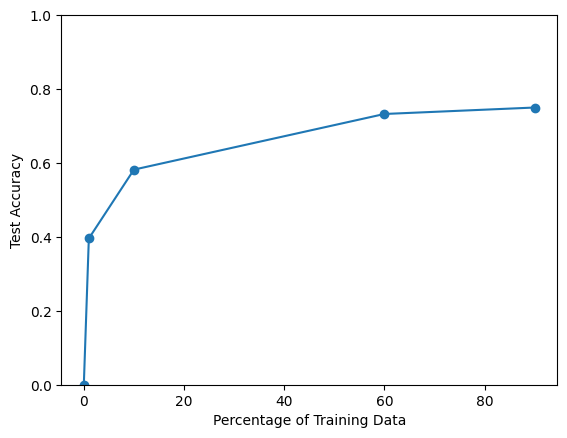

In [ ]:
# The test accuracy is 0 when there is no training data
train_size_0 = 0
acc_0 = 0
# Percentages of training data
train_sizes = [
    train_size_0,
    100 * (1 - test_size_1),
    100 * (1 - test_size_2),
    100 * (1 - test_size_3),
    100 * (1 - test_size_4)
    ]
# Test accuracy values
accuracies = [acc_0, acc_1, acc_2, acc_3, acc_4]
# Make a line graph, where each point is marked by an 'o' symbol
plt.plot(train_sizes, accuracies, marker='o')
# Set the label for the x-axis
plt.xlabel("Percentage of Training Data")
# Set the label for the y-axis
plt.ylabel("Test Accuracy")
# Set the limits on the the y-axis
plt.ylim(0, 1)
# Display a line graph
plt.show()

***Comments on the observed results:***

> Test accuracy improves with the increase of the training dataset because more information being provided to the model, and this model is trained to predict better. The increase in accuracy is sharp for small number of training data and smooth for lange number of training data.
